In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab
%matplotlib inline

In [3]:
books = pd.read_csv('/Users/chintan.desai/Documents/Chintan/DataScience/Springboard/CapstoneProject_2/Data/BX-Books.csv',sep=';',error_bad_lines=False,encoding="latin-1",low_memory=False)
books.columns = ['ISBN','bookTitle','bookAuthor','yearOfPublication','publisher','imageUrlS','imageUrlM','imageUrlL']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\nSkipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\nSkipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\nSkipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [4]:
users = pd.read_csv('/Users/chintan.desai/Documents/Chintan/DataScience/Springboard/CapstoneProject_2/Data/BX-Users.csv',sep=';',error_bad_lines=False,encoding="latin-1",low_memory=False)
user_book_ratings = pd.read_csv('/Users/chintan.desai/Documents/Chintan/DataScience/Springboard/CapstoneProject_2/Data/BX-Book-Ratings.csv',sep=';',error_bad_lines=False,encoding="latin-1",low_memory=False)


In [13]:
books.shape

(271360, 8)

In [14]:
users.shape

(278858, 3)

In [15]:
user_book_ratings.shape

(1149780, 3)

In [16]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [17]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [18]:
user_book_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Books data set EDA

##### Dropping the Image Columns

In [5]:
books.drop(['imageUrlS','imageUrlM','imageUrlL'],axis=1,inplace=True)

In [20]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [43]:
#setting the column display to wide to better visualise the column contents
#books.set_option('display.max_colwidth',-1)
#books.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',-1)


In [25]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


#### EDA on 'yearsOfPublication'

In [8]:
#checking yearOfPublication
books.yearOfPublication.unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958', '1974',
       '1976', '1971', '1977', '1975', '1965', '1941', '1970', '1962',
       '1973', '1972', '1960', '1966', '1920', '1956', '1959', '1953',
       '1951', '1942', '1963', '1964', '1969', '1954', '1950', '1967',
       '2005', '1957', '1940', '1937', '1955', '1946', '1936', '1930',
       '2011', '1925', '1948', '1943', '1947', '1945', '1923', '2020',
       '1939', '1926', '1938', '2030', '1911', '1904', '1949', '1932',
       '1928', '1929', '1927', '1931', '1914', '2050', '1934', '1910',
       '1933', '1902', '1924', '1921', '1900', '2038', '2026', '1944',
       '1917', '1901', '2010', '1908', '1906', '1935', '1806', '2021',
       '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909', '2008',

In [44]:
#lets correct all the wrong entries where we see name instead of a year 
#lets correct 'DK Publishing Inc' 
books.loc[books['yearOfPublication'] == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [6]:
#correcting the two rows above
books.loc[books['ISBN'] == '078946697X','bookAuthor'] = 'Michael Teitelbaum'
books.loc[books['ISBN'] == '078946697X','yearOfPublication'] = '2000'
books.loc[books['ISBN'] == '078946697X','publisher'] = 'DK Publishing Inc'



books.loc[books['ISBN'] == '0789466953','bookAuthor'] = 'James Buckley'
books.loc[books['ISBN'] == '0789466953','yearOfPublication'] = '2000'
books.loc[books['ISBN'] == '0789466953','publisher'] = 'DK Publishing Inc'



In [46]:
books.loc[books['ISBN'] == '078946697X',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",Michael Teitelbaum,2000,DK Publishing Inc


In [40]:
books.loc[books.ISBN == '0789466953',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",James Buckley,2000,DK Publishing Inc


In [47]:
#lets correct 'Gallimard'

books.loc[books['yearOfPublication'] == 'Gallimard',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [8]:
#correcting the row above
books.loc[books['ISBN'] == '2070426769','bookAuthor'] = 'ean-Marie Gustave Le'
books.loc[books['ISBN'] == '2070426769','yearOfPublication'] = '2003'
books.loc[books['ISBN'] == '2070426769','publisher'] = 'Gallimard'
books.loc[books['ISBN'] == '2070426769','bookTitle'] = 'Peuple du ciel, suivi de \'Les Bergers'


In [49]:
books.loc[books['ISBN'] == '2070426769',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",ean-Marie Gustave Le,2003,Gallimard


In [50]:
books['yearOfPublication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958', '1974',
       '1976', '1971', '1977', '1975', '1965', '1941', '1970', '1962',
       '1973', '1972', '1960', '1966', '1920', '1956', '1959', '1953',
       '1951', '1942', '1963', '1964', '1969', '1954', '1950', '1967',
       '2005', '1957', '1940', '1937', '1955', '1946', '1936', '1930',
       '2011', '1925', '1948', '1943', '1947', '1945', '1923', '2020',
       '1939', '1926', '1938', '2030', '1911', '1904', '1949', '1932',
       '1928', '1929', '1927', '1931', '1914', '2050', '1934', '1910',
       '1933', '1902', '1924', '1921', '1900', '2038', '2026', '1944',
       '1917', '1901', '2010', '1908', '1906', '1935', '1806', '2021',
       '2012', '2006', '1909', '2008', '1378', '1919', '1922', '1897',
 

In [51]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

In [9]:
#Converting the yearOfPublication to int

books['yearOfPublication'] = pd.to_numeric(books.yearOfPublication)

In [53]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    int64 
publisher            object
dtype: object

In [55]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    int32 
publisher            object
dtype: object

In [56]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [57]:
books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

#### We still see some values in 'yearOfPublication' that are '0' or 1378' or '2030'
#### lets replace everything before 1900 and evertyhing after 2010 with the average  value 

In [58]:
books.yearOfPublication.mean()

1959.7612728478773

(1900, 2010)

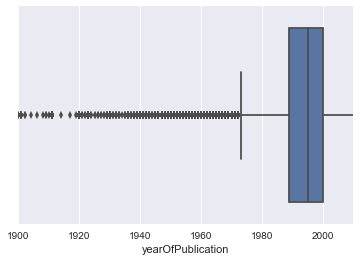

In [59]:
sns.boxplot(x='yearOfPublication', data=books)
plt.xlim(1900, 2010)

In [10]:
# Impute outliers function
def impute_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [11]:
books_new = impute_outliers(df=books, column='yearOfPublication' , minimum=1900, maximum=2010)


In [62]:
books_new.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


In [12]:
#lets convert 'yearsOfPublication' to int32 to get ridoff decimal 


books['yearOfPublication'] = books['yearOfPublication'].astype(np.int32)

In [64]:
books_new.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [65]:
books_new['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1959, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 1925, 1948,
       1943, 1947, 1945, 1923, 1939, 1926, 1938, 1911, 1904, 1949, 1932,
       1928, 1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902, 1924, 1921,
       1900, 1944, 1917, 1901, 2010, 1908, 1906, 1935, 2006, 1909, 2008,
       1919, 1922])

In [66]:
books_new.loc[books_new['yearOfPublication'].isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


#### EDA on 'publisher' feature

In [34]:
books_new.loc[books_new['publisher'].isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [13]:
#lets correct the columns without any values by replacing with 'unknown'
books_new.loc[books_new.ISBN == '193169656X','publisher'] = 'UnKnown'
books_new.loc[books_new.ISBN == '1931696993','publisher'] = 'UnKnown'

In [36]:
books_new.loc[books_new['publisher'].isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


#### EDA on 'ISBN' feature

In [68]:
books_new.loc[books_new['ISBN'].isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [69]:
#Checking ISBN
books_new['ISBN'].unique()

array(['0195153448', '0002005018', '0060973129', ..., '006008667X',
       '0192126040', '0767409752'], dtype=object)

### Users data set EDA

In [70]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [72]:
users.dtypes

User-ID     int64  
Location    object 
Age         float64
dtype: object

#### EDA on 'Age' feature

In [73]:
users.loc[users['Age'].isnull(),:]

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
2,3,"moscow, yukon territory, russia",NaN
4,5,"farnborough, hants, united kingdom",NaN
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
11,12,"fort bragg, california, usa",NaN
13,14,"mediapolis, iowa, usa",NaN
14,15,"calgary, alberta, canada",NaN
15,16,"albuquerque, new mexico, usa",NaN


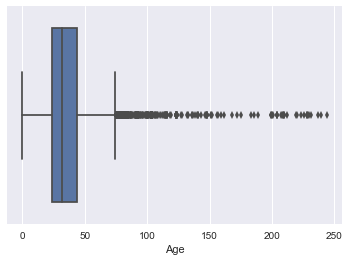

In [79]:
sns.boxplot(x='Age', data=users)


#### As we can see above there are lot of outliers and some high values in Age like greater than 90 years so we are going to do two things:
##### 1> For the all the 'Age' with values NaN , replace with the Average Age
##### 2> Replace any 'Age' less then 5 and greater then 90 with the Average Age

In [14]:
users['Age']=users['Age'].fillna(users['Age'].mean())

In [15]:
users_new = impute_outliers(df=users, column='Age' , minimum=5, maximum=90)


In [83]:
users_new.loc[users['Age'].isnull(),:]

,User-ID,Location,Age


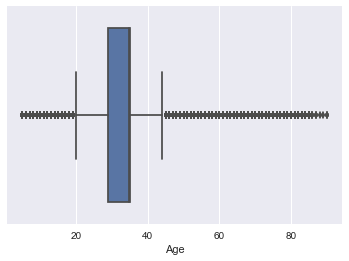

In [84]:
sns.boxplot(x='Age', data=users_new)

In [85]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34.72384
1,2,"stockton, california, usa",18.00000
2,3,"moscow, yukon territory, russia",34.72384
3,4,"porto, v.n.gaia, portugal",17.00000
4,5,"farnborough, hants, united kingdom",34.72384


In [16]:
#We see the decimal in the 'Age' so we will convert it to int32

users['Age'] = users['Age'].astype(np.int32)


In [87]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


### Ratings data set EDA

In [89]:
user_book_ratings.shape

(1149780, 3)

In [90]:
user_book_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


#### Lets check if all the Users in the 'user_book_ratings_new' are also in 'users' table to make sure there is no stray user

In [17]:
user_book_ratings_new = user_book_ratings[user_book_ratings['User-ID'].isin(users['User-ID'])]

In [95]:
user_book_ratings_new.shape

(1149780, 3)

#### This proves that we dont have any user in the 'user_book_ratings_new' that is not part of 'users'

#### Lets check if all the Books in the 'user_book_ratings_new' are also in 'books' table to make sure there is no stray book

In [18]:
user_book_ratings_new = user_book_ratings[user_book_ratings['ISBN'].isin(books['ISBN'])]

In [97]:
user_book_ratings_new.shape

(1031136, 3)

#### This proves that we have books in the 'user_book_ratings_new' that is not part of 'books'
#### As shown below we just merge/join the 'user_book_ratings_new' and 'books' table to only have the books that are part of 'books'

In [20]:
df = pd.merge(user_book_ratings,books,on='ISBN')
df.head()

,User-ID,ISBN,Book-Rating,bookTitle,bookAuthor,yearOfPublication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [99]:
df.shape

(1031136, 7)

#### Lets Merge the 'user_book_ratings' with 'users'

In [21]:
df_new = pd.merge(df,users,on='User-ID')
df_new.head()

,User-ID,ISBN,Book-Rating,bookTitle,bookAuthor,yearOfPublication,publisher,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",34
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23


In [101]:
df_new.shape

(1031136, 9)

In [102]:
df_new.groupby('bookTitle')['Book-Rating'].count().sort_values(ascending=False).head()

bookTitle
Wild Animus                   2502
The Lovely Bones: A Novel     1295
The Da Vinci Code             898 
A Painted House               838 
The Nanny Diaries: A Novel    828 
Name: Book-Rating, dtype: int64

#### We will take a rating of '0' as the user has not read the book, so lets keep this out

In [22]:
df_new_explicit = df_new[df_new['Book-Rating'] != 0]

In [104]:
df_new_explicit.shape

(383842, 9)

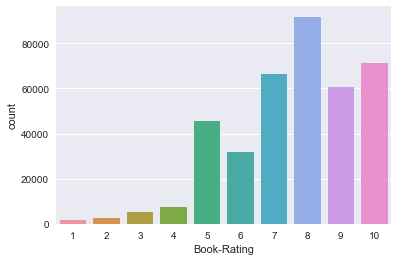

In [106]:
sns.countplot(data=df_new_explicit,x='Book-Rating')
plt.show()

In [110]:
df_new_explicit.groupby('ISBN')['Book-Rating'].count().sort_values(ascending=False).head()

ISBN
0316666343    707
0971880107    581
0385504209    487
0312195516    383
0060928336    320
Name: Book-Rating, dtype: int64

### Recommendations based on Most Popular Items 

In [114]:
top_10_recommend = df_new_explicit.groupby('ISBN')['Book-Rating'].sum().sort_values(ascending=False).head(10)

top_10_recommend_df = pd.DataFrame(df_new_explicit.groupby('ISBN')['Book-Rating'].sum().sort_values(ascending=False).head(10))

In [116]:
top_10_recommend_df.head()

,Book-Rating
ISBN,
0316666343,5787
0385504209,4108
0312195516,3134
059035342X,2798
0142001740,2595


In [118]:
#Note that 'ISBN' is an index in the data frame 'top_10_recomend_df' 
#So below we set the argument 'left_index=True'
top_10_df = top_10_recommend_df.merge(books,right_on='ISBN',left_index=True) 

In [123]:
top_10_df

,Book-Rating,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998,Warner Books
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star


### Recommendations based on User-User Collaborative Filtering

### A few similarity functions

These were all written to operate on two pandas Series, each one representing the rating history of two different users. You can also apply them to any two feature vectors that describe users or items. In all cases, the higher the return value, the more similar two Series are. You might need to add checks for edge cases, such as divisions by zero, etc.

- Euclidean 'similarity'

$$ sim(x,y) = \frac{1}{1 + \sqrt{\sum (x - y)^2}}$$

In [126]:
def euclidean(s1, s2):
    """Take two pd.Series objects and return their euclidean 'similarity'."""
    diff = s1 - s2
    return 1 / (1 + np.sqrt(np.sum(diff ** 2)))

- Manhatten 'similarity'

$$ sim(x,y) = \frac{1}{1 +{\sum (x - y)}}$$

In [69]:
def manhatten(s1, s2):
    """Take two pd.Series objects and return their euclidean 'similarity'."""
    diff = s1 - s2
    return 1 / (1 + np.sum(diff))

- Cosine similarity

$$ sim(x,y) = \frac{(x . y)}{\sqrt{(x . x) (y . y)}} $$

In [127]:
def cosine(s1, s2):
    """Take two pd.Series objects and return their cosine similarity."""
    return np.sum(s1 * s2) / np.sqrt(np.sum(s1 ** 2) * np.sum(s2 ** 2))

- Pearson correlation or Normalised Cosine Similarity

$$ sim(x,y) = \frac{(x - \bar x).(y - \bar y)}{\sqrt{(x - \bar x).(x - \bar x) * (y - \bar y)(y - \bar y)}} $$

In [392]:
def pearson(s1, s2):
    """Take two pd.Series objects and return a pearson correlation."""
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))

- Jaccard similarity

$$ sim(x,y) = \frac{(x . y)}{(x . x) + (y . y) - (x . y)} $$

In [130]:
def jaccard(s1, s2):
    dotp = np.sum(s1 * s2)
    return dotp / (np.sum(s1 ** 2) + np.sum(s2 ** 2) - dotp)



#### Note that the next step is to generate the User-to-Item Matrix which is going to be a sparce matrix so to make sure my porsenal computer can effectively process this matix I am going to only consider the book that has atleast 100 ratings and users who have reated atleast 100 books

In [49]:
book_counts = df_new_explicit['Book-Rating'].value_counts()

In [50]:
book_counts.size

10

In [51]:
book_counts_100 = book_counts[book_counts > 100]

In [52]:
book_counts_100.size

10

In [53]:
df_new_explicit_red = df_new_explicit[df_new_explicit['Book-Rating'].isin(book_counts_100.index)]

In [54]:
user_counts = df_new_explicit['User-ID'].value_counts()

In [55]:
user_counts_100 = user_counts[user_counts > 100]

In [56]:
user_counts_100.size

440

In [57]:
df_new_explicit_red = df_new_explicit_red[df_new_explicit_red['User-ID'].isin(user_counts_100.index)]

In [58]:
df_new_explicit_red.shape

(102371, 9)

In [59]:
df_new_explicit_red.head()

,User-ID,ISBN,Book-Rating,bookTitle,bookAuthor,yearOfPublication,publisher,Location,Age
43,6543,0446605484,10,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,"strafford, missouri, usa",34
47,6543,0805062971,8,Fight Club,Chuck Palahniuk,1999,Owl Books,"strafford, missouri, usa",34
48,6543,0345342968,8,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,"strafford, missouri, usa",34
49,6543,0446610038,9,1st to Die: A Novel,James Patterson,2002,Warner Vision,"strafford, missouri, usa",34
55,6543,0061009059,8,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,"strafford, missouri, usa",34


In [60]:
booksmat = df_new_explicit_red.pivot_table(index='User-ID',columns='ISBN',values='Book-Rating')
userID = booksmat.index
ISBN = booksmat.columns


In [61]:
print(booksmat.shape)

(440, 66076)


In [62]:
booksmat.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Since NaNs cannot be handled by training algorithms, replacing these by 0, which indicates absence of ratings



In [88]:
booksmat.fillna(0, inplace = True)
booksmat = booksmat.astype(np.int32)

In [219]:
booksmat.head(10)

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Matrix Manipulation Work - Not part of delivered code but important to build the concept on

In [233]:
user_ids

Int64Index([  2033,   2110,   2276,   4017,   4385,   5582,   6242,   6251,
              6543,   6575,
            ...
            269566, 270713, 271448, 271705, 273113, 274061, 274301, 275970,
            277427, 278418],
           dtype='int64', name='User-ID', length=440)

In [187]:
s1_vals.index

Index(['0000913154', '0001046438', '000104687X', '0001047213', '0001047973',
       '000104799X', '0001048082', '0001053736', '0001053744', '0001055607',
       ...
       'B000092Q0A', 'B00009EF82', 'B00009NDAN', 'B0000DYXID', 'B0000T6KHI',
       'B0000VZEJQ', 'B0000X8HIE', 'B00013AX9E', 'B0001I1KOG', 'B000234N3A'],
      dtype='object', name='ISBN', length=66076)

In [188]:
s1_vals.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [189]:
s1_vals_arr_check = booksmat.iloc[s1,:].values.reshape(1,-1)

In [177]:
man_distance2 = manhatten(s1_vals, s4_vals)

In [178]:
man_distance2

-0.0051546391752577319

In [146]:
s1_vals.shape

(1, 66076)

In [230]:
user_id_vals = [label for index, label in enumerate(booksmat)]

In [231]:
user_id_vals[0]

'0000913154'

In [218]:
s1 = booksmat.index.get_loc(2033)
s2 = booksmat.index.get_loc(2110)
s4 = booksmat.index.get_loc(6543)

s4

8

In [209]:
s1_vals = booksmat.iloc[s1,:]
s2_vals = booksmat.iloc[s2,:]
s4_vals = booksmat.iloc[s4,:]

In [267]:
s1_vals.index

Index(['0000913154', '0001046438', '000104687X', '0001047213', '0001047973',
       '000104799X', '0001048082', '0001053736', '0001053744', '0001055607',
       ...
       'B000092Q0A', 'B00009EF82', 'B00009NDAN', 'B0000DYXID', 'B0000T6KHI',
       'B0000VZEJQ', 'B0000X8HIE', 'B00013AX9E', 'B0001I1KOG', 'B000234N3A'],
      dtype='object', name='ISBN', length=66076)

In [270]:
s1_vals.index[0]

'0000913154'

In [271]:
s1_vals.values[0]

0

In [200]:
s1_vals_arr = booksmat.iloc[s1,:].values.reshape(1,-1)
s2_vals_arr = booksmat.iloc[s2,:].values.reshape(1,-1)
s4_vals_arr = booksmat.iloc[s4,:].values.reshape(1,-1)

In [210]:
man_distance = manhatten(s1_vals, s2_vals)

man_distance



0.003663003663003663

In [245]:
#note that the following line would give us the index and label for the Books which are columns
user_id_vals = [index for index, label in enumerate(booksmat)]



In [246]:
user_id_vals

Int64Index([  2033,   2110,   2276,   4017,   4385,   5582,   6242,   6251,
              6543,   6575,
            ...
            269566, 270713, 271448, 271705, 273113, 274061, 274301, 275970,
            277427, 278418],
           dtype='int64', name='User-ID', length=440)

In [ ]:
#here is a code to get the index of the user
user_id_vals = booksmat.index
#here is the code to get the values of the user ratings
user_rating_vals = booksmat.values   

In [249]:
user_rating_vals.shape

(440, 66076)

#### Implementing Manhattan distance and Pearson Distance 

In [404]:
def computeNearestNeighbor_manhatten(myuserid,booksmat):
        distances = []
        
        user_id_vals = booksmat.index
    
        for user_id in user_id_vals:
            s1 = booksmat.index.get_loc(user_id)
            s1_val = booksmat.iloc[s1,:]
            s2_user_id = booksmat.index.get_loc(myuserid)
            s2_val = booksmat.iloc[s2_user_id,:]
            man_distance = manhatten(s1_val, s2_val)
            distances.append((man_distance,user_id))
        distances.sort()
        return distances
    

In [390]:
def computeNearestNeighbor_pearson(myuserid,booksmat):
        distances = []
        
        user_id_vals = booksmat.index
    
        for user_id in user_id_vals:
            s1 = booksmat.index.get_loc(user_id)
            s1_val = booksmat.iloc[s1,:]
            s2_user_id = booksmat.index.get_loc(myuserid)
            s2_val = booksmat.iloc[s2_user_id,:]
            man_distance = pearson(s1_val, s2_val)
            distances.append((man_distance,user_id))
        distances.sort()
        return distances
    

In [393]:
my_user_with_id = 2033

my_distances = computeNearestNeighbor_pearson(my_user_with_id,booksmat)

In [394]:
def getKey(item):
    return item[0]

In [395]:
distances_sorted = sorted(my_distances,key=getKey)

In [396]:
top_10_similar_users=distances_sorted[0:9]

top_10_similar_users

[(-0.0095496630450703276, 98391),
 (-0.0058497416186382148, 11676),
 (-0.0052484467915089785, 76499),
 (-0.0048923941382710313, 56399),
 (-0.0039849618246609432, 158295),
 (-0.003762294891643805, 204864),
 (-0.0036538999171070513, 189334),
 (-0.0036220579428763804, 107784),
 (-0.0035931042005419383, 63714)]

In [397]:
similar_user_list = []

for distance,isbn in top_10_similar_users:
    similar_user_list.append(isbn)

In [398]:
similar_user_list

[98391, 11676, 76499, 56399, 158295, 204864, 189334, 107784, 63714]

In [357]:
def find_user_book_trial(new_user_id,booksmat_st):
    #for each user find the books that this user has not rated zero with the ISBN number
    s1 = booksmat_st.index.get_loc(new_user_id)
    s1_vals = booksmat_st.iloc[s1,:]
    my_list = []
    
    for x in range(66076):
        if s1_vals.values[x] != 0:
            isbn = s1_vals.index[x]
            rating = s1_vals.values[x]
            user_id = new_user_id
            # my_list.append({'userid':user_id,'isbn':isbn,'rating':rating})
            my_list.append(isbn)
    return my_list

In [353]:
def process_user(new_user_id,existing_user_list,booksmat_in):
    
    all_existinguser_books = []
    new_user_books = []
    
    #Find all the books rated by the existing user
    for userid in existing_user_list:
        all_existinguser_books.append(find_user_book_trial(userid,booksmat_in))
        
    #Find all the books rated by the new user    
    new_user_books = find_user_book_trial(new_user_id,booksmat_in)    
    
    return all_existinguser_books,new_user_books
        

In [406]:
def findNeighbors_recommend_books(user_id,matrixin):
    my_distances = computeNearestNeighbor_manhatten(user_id,matrixin)
    top_10_similar_users=my_distances[0:9]
    similar_user_list = []

    for distance,isbn in top_10_similar_users:
        similar_user_list.append(isbn)
    
    iexisting_list_booksmat,inew_list_booksmat = process_user(user_id,similar_user_list,matrixin)
    
    existing_list_flat_n = [item for sublist in iexisting_list_booksmat for item in sublist]
    
    recommended_book = [value for value in existing_list_flat_n if value not in inew_list_booksmat]
    
    
    return recommended_book 


#### Main function call below

In [407]:
recommended_bks = findNeighbors_recommend_books(2033,booksmat)

In [408]:
len(recommended_bks)

1210

#### Checking and playing around with the recommendations we obtained

In [352]:
similar_user_list

[205735, 181176, 52584, 122793, 160295, 101606, 179718, 48494, 94951]

In [399]:


texisting_list_booksmat,tnew_list_booksmat = process_user(2033,similar_user_list,booksmat)

In [400]:
existing_list_flat_n = [item for sublist in texisting_list_booksmat for item in sublist]

In [382]:
len(tnew_list_booksmat)

129

In [401]:
tnew_list_booksmat[0]

'0030020786'

In [388]:
books.loc[books['ISBN'] == '0030020786',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
2511,0030020786,Principles of Instrumental Analysis,Douglas A. Skoog,1997,Brooks Cole


In [383]:
len(existing_list_flat_n)

1215

In [402]:
existing_list_flat_n[0]

'0060001445'

In [403]:
books.loc[books['ISBN'] == '0060001445',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
2731,0060001445,"Her Highness, My Wife",Victoria Alexander,2002,Avon


In [384]:
recommended_book = [value for value in existing_list_flat_n if value not in new_list_booksmat]

In [385]:
len(recommended_book)

1210